# ***WEEK - 1***

# Importing pandas:used for data manipulation, analysis and cleaning

In [5]:
# import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score
import joblib

# Opening csv file form local drive

In [7]:
df = pd.read_csv('water_potability.csv')
df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


# use_cols parameter

In [8]:
pd.read_csv('water_potability.csv',usecols=['ph','Hardness','Solids'])

,ph,Hardness,Solids
0,NaN,204.890455,20791.318981
1,3.716080,129.422921,18630.057858
2,8.099124,224.236259,19909.541732
3,8.316766,214.373394,22018.417441
4,9.092223,181.101509,17978.986339
...,...,...,...
3271,4.668102,193.681735,47580.991603
3272,7.808856,193.553212,17329.802160
3273,9.419510,175.762646,33155.578218
3274,5.126763,230.603758,11983.869376


# nrows Parameter

In [9]:
pd.read_csv('water_potability.csv',nrows=20)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
6,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0
7,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0
8,NaN,118.988579,14285.583854,7.804174,268.646941,389.375566,12.706049,53.928846,3.595017,0
9,11.180284,227.231469,25484.508491,9.077200,404.041635,563.885481,17.927806,71.976601,4.370562,0


# dtypes parameter

In [10]:
pd.read_csv('water_potability.csv',dtype={'target':int}).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [ ]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [11]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [12]:
print(df.isnull().sum())

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64


# ***WEEK - 2***

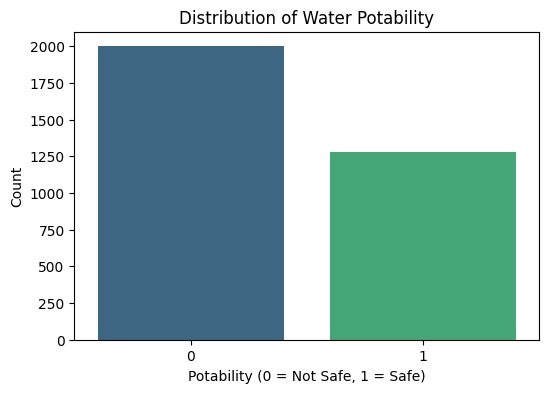

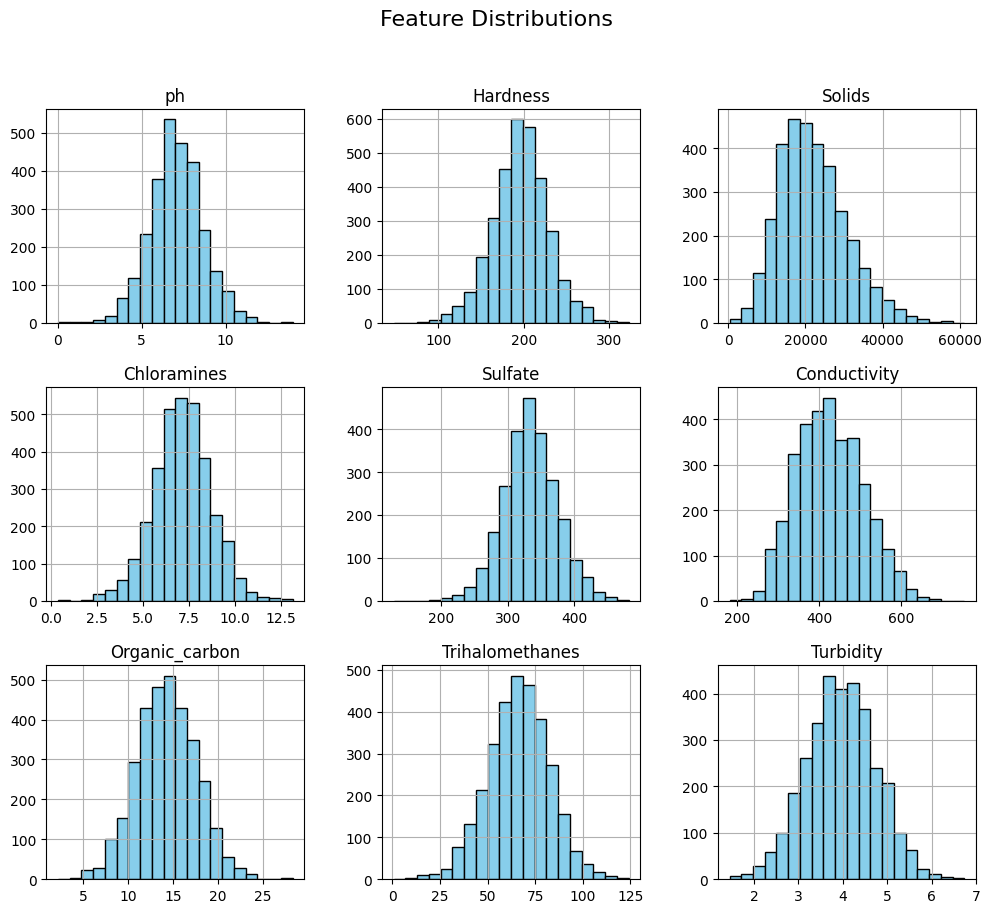

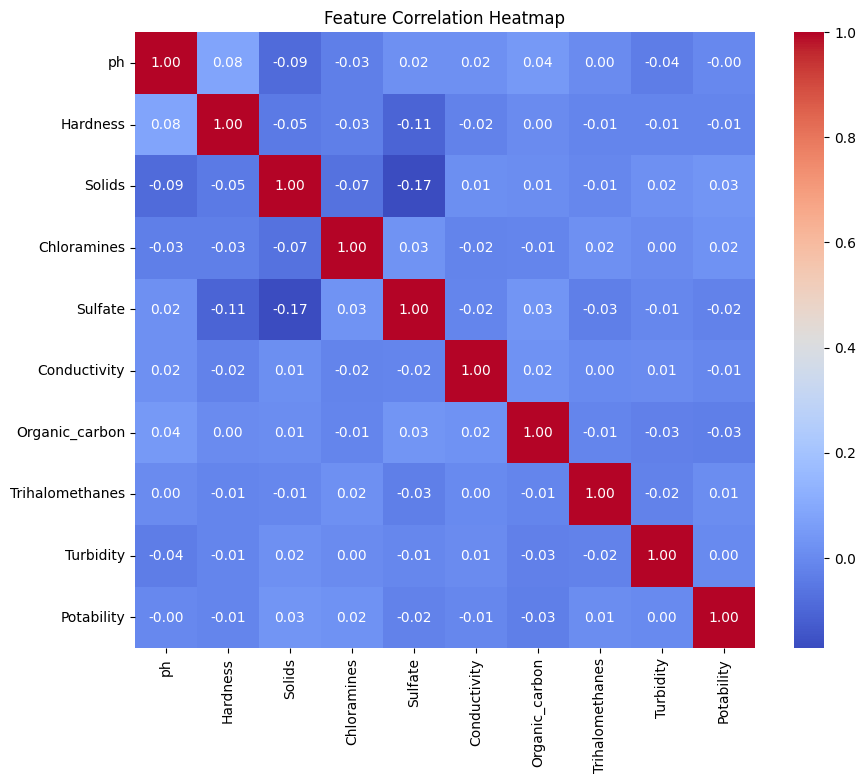

In [16]:
# Exploratory Data Analysis
# 1. Target Distribution (Potability)
plt.figure(figsize=(6,4))
sns.countplot(x="Potability", hue="Potability", data=df, palette="viridis", legend=False)
plt.title("Distribution of Water Potability")
plt.xlabel("Potability (0 = Not Safe, 1 = Safe)")
plt.ylabel("Count")
print("\n""\n")
plt.show()

# 2. Quick Overview of Feature Distributions (all in one grid)
df.drop(columns=["Potability"]).hist(
    figsize=(12,10),
    bins=20,
    color="skyblue",
    edgecolor="black"
)
plt.suptitle("Feature Distributions", fontsize=16)
print("\n""\n")
plt.show()

# 3. Correlation Heatmap
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
print("\n""\n")
plt.show()

In [24]:
# Data Transformation for Water Quality Prediction

import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Load your dataset
df = pd.read_csv('water_potability.csv')

# 1. Drop ID-like columns (none in this dataset, so we skip this step)
# (No unique IDs to remove)

# 2. Handle missing values (important for this dataset)
imputer = SimpleImputer(strategy="mean")
df[df.columns] = imputer.fit_transform(df)

# 3. No categorical variables here, so no encoding is required
# (All features are already numeric)

# 4. Feature scaling (helps models like Logistic Regression, SVM, KNN)
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df.drop(columns=["Potability"]))

# Combine scaled features with the target back into a DataFrame
scaled_df = pd.DataFrame(scaled_features, columns=df.columns[:-1])
scaled_df["Potability"] = df["Potability"]

# Final transformed dataset
scaled_df


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,-6.043133e-16,0.259195,-0.139471,0.112415,9.613574e-01,1.708954,-1.180651,1.306149,-1.286298,0.0
1,-2.289339e+00,-2.036414,-0.385987,-0.307694,3.145987e-15,2.062575,0.270597,-0.638480,0.684218,0.0
2,6.928678e-01,0.847665,-0.240047,1.360594,3.145987e-15,-0.094032,0.781117,0.001509,-1.167365,0.0
3,8.409504e-01,0.547651,0.000493,0.592008,6.395190e-01,-0.778830,1.255134,2.152874,0.848412,0.0
4,1.368569e+00,-0.464429,-0.460249,-0.363698,-6.541765e-01,-0.343939,-0.824357,-2.181599,0.138786,0.0
...,...,...,...,...,...,...,...,...,...,...
3271,-1.641587e+00,-0.081758,2.916188,0.028027,7.242640e-01,1.240155,-0.118075,0.018481,0.601124,1.0
3272,4.953704e-01,-0.085667,-0.534295,0.593290,3.145987e-15,-0.417706,1.698560,0.000000,-1.497627,1.0
3273,1.591254e+00,-0.626829,1.270810,0.144017,3.145987e-15,0.072263,-0.981329,0.218748,-0.856007,1.0
3274,-1.329516e+00,1.041355,-1.144058,-0.517373,3.145987e-15,-0.288597,-0.942064,0.703468,0.950797,1.0


In [27]:
# Feature Selection
#Importing required Libraries
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

X = scaled_df.drop(columns=["Potability"])
y = scaled_df["Potability"]
# Logistic Regression
model = LogisticRegression()
rfe = RFE(model, n_features_to_select=5)  # choose top 5 features
rfe.fit(X, y)

selected_features = X.columns[rfe.support_].tolist()
print("Selected features:", selected_features)


Selected features: ['Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Organic_carbon']
